In [1]:
import os, shutil

train_dir = 'C:/Users/KIMHAKBIN/A_My Python/Datacloud/digits/Original/USPS_categorize/train'
test_dir = 'C:/Users/KIMHAKBIN/A_My Python/Datacloud/digits/Original/USPS_categorize/test'

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


#train_datagen.fit(images, augment=True, seed=seed)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (28,28),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = (28,28),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Using TensorFlow backend.


Found 7291 images belonging to 10 classes.
Found 2007 images belonging to 10 classes.


In [3]:
from keras import layers
from keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

In [4]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model1.fit_generator(train_generator,
                               steps_per_epoch=114, 
                               epochs=30,
                               validation_data=validation_generator,
                               validation_steps=32)

Epoch 1/30
114/114 [==============================] - 11s 93ms/step - loss: 0.4538 - acc: 0.8613 - val_loss: 0.2540 - val_acc: 0.9297
Epoch 2/30
114/114 [==============================] - 5s 41ms/step - loss: 0.1119 - acc: 0.9627 - val_loss: 0.2399 - val_acc: 0.9367
Epoch 3/30
114/114 [==============================] - 5s 41ms/step - loss: 0.0670 - acc: 0.9786 - val_loss: 0.2041 - val_acc: 0.9542
Epoch 4/30
114/114 [==============================] - 5s 41ms/step - loss: 0.0460 - acc: 0.9857 - val_loss: 0.2590 - val_acc: 0.9397
Epoch 5/30
114/114 [==============================] - 5s 41ms/step - loss: 0.0346 - acc: 0.9900 - val_loss: 0.1784 - val_acc: 0.9542
Epoch 6/30
114/114 [==============================] - 5s 41ms/step - loss: 0.0237 - acc: 0.9937 - val_loss: 0.2424 - val_acc: 0.9502
Epoch 7/30
114/114 [==============================] - 5s 41ms/step - loss: 0.0191 - acc: 0.9941 - val_loss: 0.2440 - val_acc: 0.9567
Epoch 8/30
114/114 [==============================] - 5s 41ms/step -

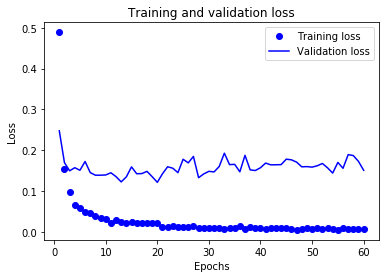

In [7]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

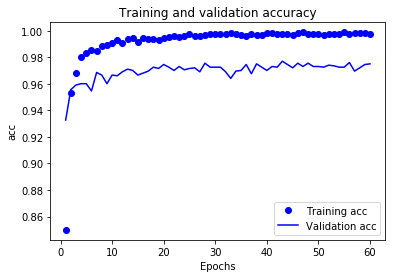

In [8]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()